In [58]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [59]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [60]:
print('features:', features[0], '\nlabels:', labels[0])

features: tensor([ 1.3760, -1.0631]) 
labels: tensor([10.5592])


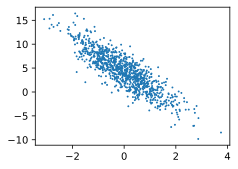

In [61]:
d2l.set_figsize()
#用的第二维的数据，此时的w为-3.4，若改为feature[:,0]则是w为2
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

<span style="font-size:1.5em;color:red">读取数据集</span>

In [62]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [63]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.8909, -0.3751],
        [-0.5921,  0.7364],
        [ 2.2124, -0.7831],
        [-0.4433,  0.4253],
        [ 0.6261, -1.1516],
        [ 0.1432, -1.2203],
        [ 0.3201, -0.9104],
        [-0.9323,  0.8758],
        [-0.4452,  1.8826],
        [-0.4099, -1.4055]]) 
 tensor([[ 3.6942],
        [ 0.5124],
        [11.3028],
        [ 1.8711],
        [ 9.3664],
        [ 8.6278],
        [ 7.9291],
        [-0.6312],
        [-3.0825],
        [ 8.1656]])


<span style="font-size:1.5em;color:red">初始化模型参数</span>

In [64]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w,b

(tensor([[0.0010],
         [0.0057]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [65]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [66]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [67]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [68]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.029186
epoch 2, loss 0.000104
epoch 3, loss 0.000056


In [69]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-2.3293e-04, -3.7909e-05], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0004], grad_fn=<RsubBackward1>)
